In [ ]:
Денис Иваанов
Домашнее задание: Введение в статистику

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import ssl
import statistics
%matplotlib inline

In [11]:
ssl._create_default_https_context = ssl._create_unverified_context # подключает сертификат для защищенного соединения
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [150]:
# проверяем датасет на наличие пропущенных значений / удаляем выбросы
df.isnull().sum()
df[df.Freedom.isnull()]
df_1 = df[df.Freedom.notnull()]
print('Очевидный выброс  - ', df[df.Freedom.isnull()].iloc[0, 0], ' - отсутствие наблюдений по ключевым параметрам')

Очевидный выброс  -  Qatar  - отсутствие наблюдений по ключевым параметрам


In [ ]:
Построить частотный график для двух параметров: Freedom и positive affect.  

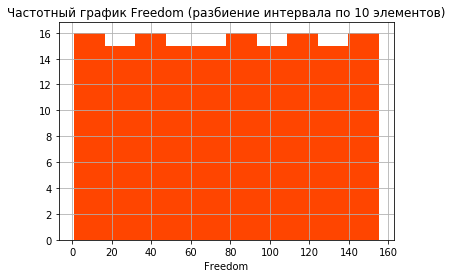

In [174]:
plt.hist(   df_1['Freedom']
         ,  10
         , facecolor='orangered')
plt.xlabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
# Имеет место равномерное распределение
# "кирпичики" в верхней части графика не говорят о качестве распределения - 
# matplotlib по умолчанию не захватывает / теряет значение совпадающее с нижней границей диапазона

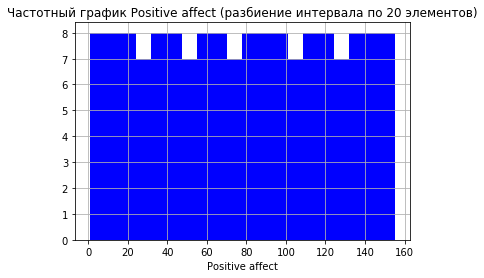

In [170]:
n, bins, patches = plt.hist(   df_1['Positive affect']
                            ,  20
                            , facecolor='blue')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()
# Имеет место равномерное распределение

In [ ]:
Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, 
найти выбросы (если есть), размах для колонки Freedom
Почему нельзя найти моду?

In [24]:
print('В целом по полю  Freedom')
print('Медиана          составляет: ', statistics.median(df_1['Freedom']))
print('Мат ожидание     составляет: ', statistics.mean(df_1['Freedom']))
print('Станд отклонение составляет: ', statistics.pstdev(df_1['Freedom']))
print('Дисперсия        составляет: ', statistics.pvariance(df_1['Freedom']))
print('Минимум          составляет: ', min(df_1['Freedom']))
print('Максимум         составляет: ', max(df_1['Freedom']))
print('Размах           составляет: ', max(df_1['Freedom'])- min(df_1['Freedom']))
print('Мода  не может быть расчитана так как все значения по полю уникальны')

В целом по полю  Freedom
Медиана          составляет:  78.0
Мат ожидание     составляет:  78.0
Станд отклонение составляет:  44.74371464239419
Дисперсия        составляет:  2002.0
Минимум          составляет:  1.0
Максимум         составляет:  155.0
Размах           составляет:  154.0
Мода  не может быть расчитана так как все значения по полю уникальны


In [ ]:
Посмотреть корреляцию между Freedom и positive affect (графически и математически). 
Графически - plt.scatter, математически - посчитать коэффициент Пирсона. 
О чем говорит знак коэффициента?

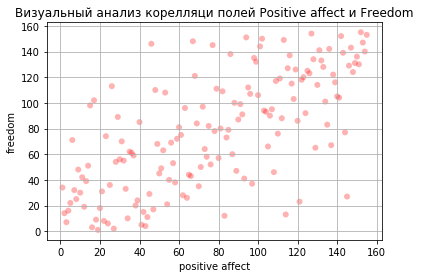

In [28]:
fig, ax = plt.subplots()
ax.scatter(df_1['Positive affect'], df_1['Freedom'], c='red', alpha=0.3, edgecolors='none')
ax.grid(True)
plt.xlabel('positive affect')
plt.ylabel('freedom')
plt.title('Визуальный анализ корелляци полей Positive affect и Freedom')
plt.show()

In [30]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_1['Freedom'], df_1['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)
print('Коэффициент корреляции Пирсона > 0, что означает:')
print('большей величине Positive affect соответствует большая величина Freedom, прямая зависимость')

Коэффициент корреляции Пирсона: 0.6817698430601657
Коэффициент корреляции Пирсона > 0, что означает:
большей величине Positive affect соответствует большая величина Freedom, прямая зависимость


In [ ]:
Нормализовать данные колонки Freedom (централизация + масштабирование)

In [37]:
freedom = df_1['Freedom']
freedom_1 = freedom - statistics.mean(freedom)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2), max(freedom_2))

#df_freedom_norm = pd.DataFrame(freedom_2)
freedom_2[85:92]

[-1.] [1.]


array([[ 0.06493506],
       [ 0.92207792],
       [-0.02597403],
       [ 0.2987013 ],
       [ 0.75324675],
       [-0.38961039],
       [-0.61038961]])

In [ ]:
Построить матрицу корреляций для всех колонок таблицы

In [22]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


In [ ]:
Загрузить таблицу цен на авокадо: https://www.kaggle.com/neuromusic/avocado-prices

In [44]:
av = pd.read_csv('avocado.csv')
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [67]:
av.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
Сделать частотный график колонки AveragePrice. Какое это распределение?

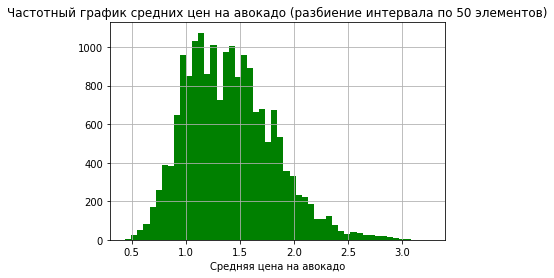

In [57]:
n, bins, patches = plt.hist(av['AveragePrice'], 50, facecolor='g')

plt.xlabel('Средняя цена на авокадо')
plt.title('Частотный график средних цен на авокадо (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()
# Имеет место нормальное распределение

In [ ]:
Найти корреляцию в следующих колонках: 4046, 4225, 4770 и Average Price. 
Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [65]:
av[['4046', '4225', '4770', 'AveragePrice']].corr()

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


In [ ]:
Межу количеством проданных товаров и их средней ценой 
наблюдается слабая обратная связь / корелляция, проще:
чем выше продажи тем ниже цена
Обратную корелляцию возможно кратно усилить, если сократить 
выборку (убрать дни/строки с общим объемом продаж > 1.2 млн шт )
- требует доп исследования

Между количеством проданных авокадо по разным сортам - 
прямая корреляция, увеличение продаж товара в целом означает
и рост в отношении каждой из товарных групп
Чем ближе коды вида/сорта товара между собой тем теснее 
связь / корелляция - это скорее всего означает эластичность 
спроса на схожие / близкие товарные группы

Коэффициент корреляции Пирсона: -0.4680795007580889


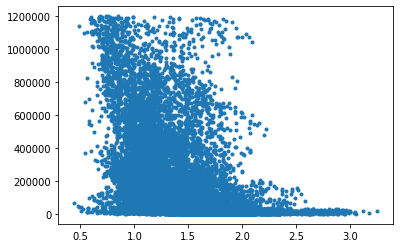

In [130]:
av1 = av.loc[av['Total Volume'] <1200000]
x = av1['AveragePrice']
y = av1['Total Volume']
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)